# Home assignment 4

Deadline: December, 14, 23:59 MSK

## Task 1 (15 pts)

- (4 pts) An urban planner would like to choose the location $x \in \mathbb{R}^2$ for a new warehouse.
This should be close to $n$ distribution centers located at $y_1, \ldots, y_n \in \mathbb{R}^2$. The objective function to identify the location of the new warehouse is the worst-case distance.
State the optimization problem that helps to identify the proper location.
- (6 pts) Use CVXPy to solve the stated problem. If CVXPy requires reformulation of the resulting problem statement, please do it.
The data for $y_i$ are presented below and taken from the open-source dataset about locations of demand points in San Francisco. See more details [here](https://github.com/huanfachen/Open_source_location_cover_models/tree/master).
Use coordinates $y_i$ from the variable ```target_demand_points``` to identify coordinate of $y$. Plot the obtained optimal position for warehouse in the same plot as demand points.


In [ ]:
# !pip install geopandas

In [ ]:
import geopandas

process = lambda df: as_gdf(df).sort_values(by=["NAME"]).reset_index(drop=True)
as_gdf = lambda df: geopandas.GeoDataFrame(df, geometry=pnts(df))
pnts = lambda df: geopandas.points_from_xy(df.long, df.lat)

def plot_results_on_map(study_area, clis):
    clis = process(clis.copy())
    fig, ax = plt.subplots(figsize=(6, 9))
    markersize = 40
    study_area.plot(ax=ax, alpha=0.5, fc="tan", ec="k", zorder=1)
    gdf = geopandas.GeoDataFrame(clis["geometry"])
    zorder = 4
    gdf.plot(ax=ax, zorder=zorder, ec="k", markersize=markersize)

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

map_area = gpd.read_file('ServiceAreas_4.shp').dissolve()

demand_points = pd.read_csv('SF_demand_205_centroid_uniform_weight.csv')
n_dem_pnts = demand_points.shape[0]
demand_points.head()
# Your solution is here

,Unnamed: 0,OBJECTID,ID,NAME,STATE_NAME,AREA,POP2000,HOUSEHOLDS,HSE_UNITS,BUS_COUNT,long,lat
0,1,1,6081602900,60816029.0,California,0.48627,4135,1679,1715,112,-122.488653,37.650807
1,2,2,6081602800,60816028.0,California,0.47478,4831,1484,1506,59,-122.483550,37.659998
2,3,3,6081601700,60816017.0,California,0.46393,4155,1294,1313,55,-122.456484,37.663272
3,4,4,6081601900,60816019.0,California,0.81907,9041,3273,3330,118,-122.434247,37.662385
4,5,5,6081602500,60816025.0,California,0.46603,5146,1459,1467,44,-122.451187,37.640219


In [ ]:
# Extract some part of demand points
target_demand_points = demand_points[:30]

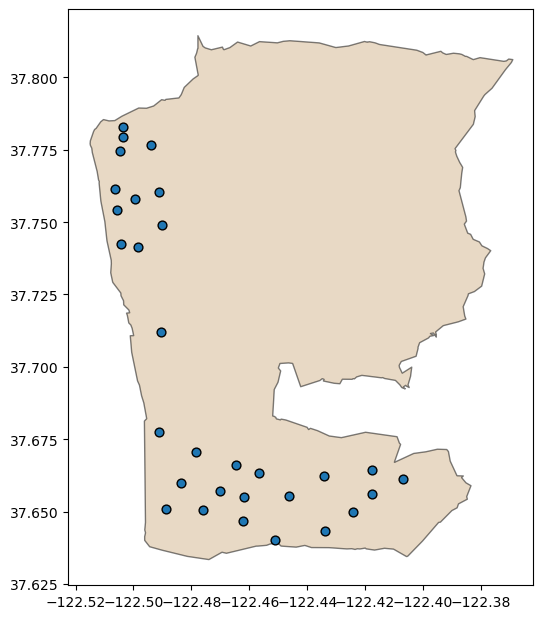

In [ ]:
plot_results_on_map(map_area, clis=target_demand_points)

In [ ]:
# Your solution is here

- (5 pts) The visualization of the demand points shows that we actually have two groups of the demand points that should be naturally serviced by two different warehouses.
Reformulate the original problem in such a way that it will provide the positions of two warehouses and automatically assign every demand point to the target warehouse. Introduce new variables if needed and try to solve it with CVXPy. To make the problem feasible for CVXPy, you can select the proper way to measure the distances such that the resulting problem becomes Mixed Integer Linear Program.

In [ ]:
# Your solution is here

## Task 2 (8 pts)

- In home assignment 2, you solved the task 3 and the result was the convex optimization peroblem. In this task, you have the necessary data and are asked to solve the stated convex optimization problem with cvxpy. If this requires reformulation of the resulting problem statement, please do it.
Take the known data from the attached file and read them with the code below.

In [ ]:
# this one is randomly generated; a real one would use the beam geometry
import scipy.io as sio
import numpy as np

def get_value(mat, name):
    value = mat[name]
    return value[0][0] if np.shape(value) == (1, 1) else value

mat = sio.loadmat("treatment_planning_data.mat")

n = get_value(mat, "n")  # number of beams
mtarget = get_value(mat, "mtarget")  # number of tumor or target voxels
mother = get_value(mat, "mother")  # number of other voxels
Atarget = get_value(mat, "Atarget")
Aother = get_value(mat, "Aother")
Bmax = get_value(mat, "Bmax")
Dtarget = get_value(mat, "Dtarget")

In [ ]:
# Your solution is here